# Minimos cuadrados no lineales

Supongamos que disponemos de un conjunto de datos $\{(x_i,y_i)\}_{i=1,\ldots,m}$. En general, los datos $y_i$ son la respuesta de un sistema a ciertas entradas dadas por las variables $x_i$. El objetivo es hallar una función $f$ tal que $y_i \approx f(x_i)$. A $f$ se le conoce como *función de regresión*.

En general, no queremos $y_i=f(x_i)$ exactamente, ya que las medidas $y_i$ pueden tener error. Lo que se busca es que la función $f$ sea sencilla, por ejemplo pertenezca a una familia paramétrica.



## Criterio de mínimos cuadrados

Para un conjunto de datos dado, existen muchas posibles $f$ que aproximan. El criterio de mínimos cuadrados establece una forma de elegir la función de regresión que mejor ajusta.

El criterio es el siguiente:

> **Criterio de mínimos cuadrados:** Dado un conjunto de datos $\{(x_i,y_i)\}_{i=1,\ldots,m}$ y una función de regresión $f(x;\theta)$ dependiente de uno o más parámetros, elegimos $\theta$ de manera que se alcance:
>
> $$\min_{\theta} \sum_{i=1}^m (y_i - f(x_i;\theta))^2.$$

El vector de parámetros $\hat{\theta}$ que alcanza el mínimo nos da la función de regresión óptima.

## El caso no lineal

El caso no lineal es cuando la función $f(x;\theta)$ no es lineal en los parámetros. En dicho caso, no hay una solución explícita como lo eran las ecuaciones normales.

### Ejemplo

Supongamos que se analiza la respuesta al impulso de un sistema de primer orden. La misma tiene la forma:

$$y = \theta_1 e^{-\theta_2 x}.$$

Si se dispone de una serie de medidas $(x_i,y_i)$, se podría ajustar $\theta_1$ y $\theta_2$ para identificar los parámetros del sistema. Sin embargo, ambos parámetros entran de forma no lineal en la función $f$.

### Alternativas

1. Algunas veces, es posible realizar un cambio de variable que convierta el problema en uno lineal. En ese caso, se aplican las ecuaciones normales y luego se deshace el cambio de variable para hallar $\theta$.

2. Se busca minimizar la función de error $R(\theta)$ directamente usando métodos iterativos. Por ejemplo, veremos el método de *Gauss-Newton*.

## Transformación de variables

En este caso, se busca una transformación de los datos $(x_i,y_i)$ que vuelva la relación entre ellos lineal en los parámetros.

### Ejemplo:

Supongamos que $f(x;\theta)$ es la anterior, es decir la relación es de la forma:

$$y=\theta_1 e^{-\theta_2 x}.$$

Aplicando logaritmos de ambos lados de la ecuación queda:

$$\log(y) = \log(\theta_1) - \theta_2 x = \tilde{\theta_1} + \tilde{\theta_2} x$$

Es decir, los datos $(x,\log(y))$ están relacionados por una recta de parámetros $\tilde{\theta}$. Ajustando a una recta mediante las ecuaciones normales, luego podemos deshacer el cambio y hallar $\theta_1 = e^{\tilde{\theta_1}}$ y $\theta_2 = -\tilde{\theta_2}$.

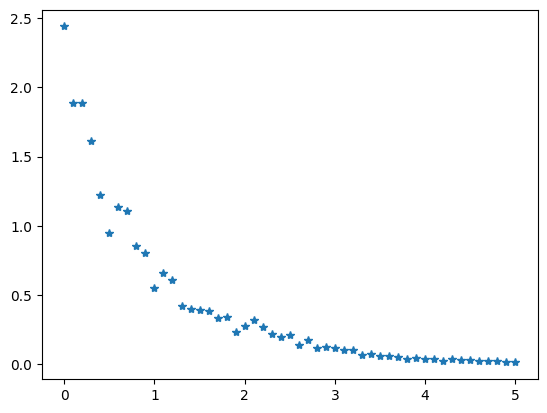

In [1]:
## Ejemplo de minimos cuadrados por transformacion de variables
using Distributions, PyPlot

x=collect(0:.1:5)
theta_real = [2.0;1.0];
yreal = theta_real[1]*exp.(-theta_real[2]*x);

y=yreal.*(1 .+0.2*rand(Normal(),size(yreal)));

plot(x,y,"*");


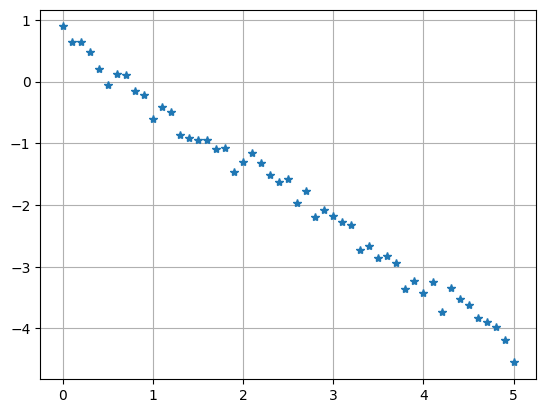

In [2]:
#Grafico en escala semilogaritmica

plot(x,log.(y),"*")
grid();

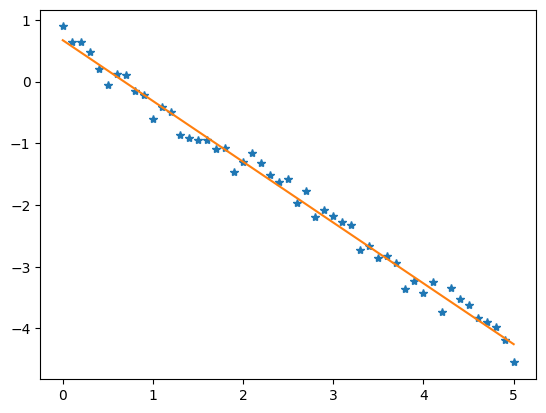

Parámetros de la recta: [0.6696847971782129, -0.9848212632545722]


In [3]:
#Ajuste a una recta del cambio de variables

A=[ones(size(x)) x];
b=log.(y);

theta_tilde = (A'*A)\(A'b);

println("Parámetros de la recta: $theta_tilde")

plot(x,log.(y),"*")
plot(x,A*theta_tilde);

theta_1=1.9536214365873277
theta_2=0.9848212632545722


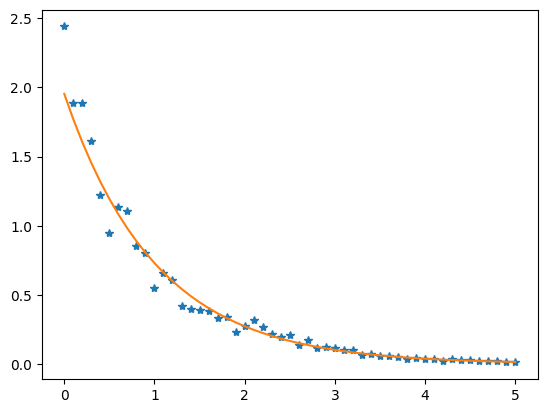

Residuo = 0.5284267152028315


In [4]:
# Recupero los valores de theta deshaciendo el cambio

theta_1 = exp(theta_tilde[1])
theta_2 = -theta_tilde[2];

yest = theta_1*exp.(-theta_2*x);
r=(y-yest);

plot(x,y,"*")
plot(x,yest);
println("theta_1=$theta_1")
println("theta_2=$theta_2")
println("Residuo = $(sum(r.^2))")

## Ejercicio

Considere la siguiente serie de datos, donde $x$ representa el tiempo en días, mientras que $y$ representa el porcentaje de insectos capturados en una trampa monitor, respecto al máximo posible. En el día $1$ se iniciaron medidas de control y se desea evaluar las mismas. Se desea ajustar una función de la forma:

$$f(x;\theta) = \frac{\theta_1}{x+\theta_2}$$

1. Realice un cambio de variables que permite realizar un ajuste lineal mediante mínimos cuadrados.
2. Ajuste por mímimos cuadrados lineales los valores transformados.
3. Recupere los valores originales de los parámetros $\theta_1,\theta_2$ y realice una proyección del comportamiento para los próximos 30 días.
4. Evalúe el error cuadrático cometido en el ajuste.

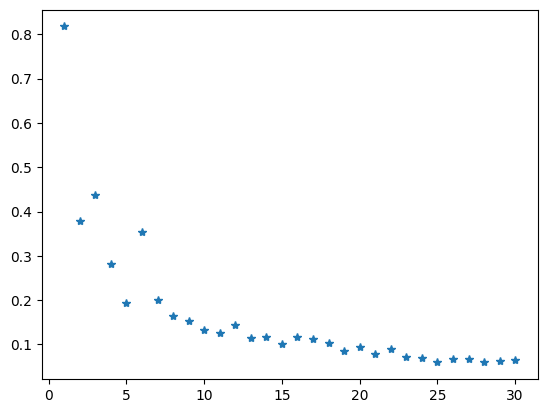

In [5]:
using PyPlot

x=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]

y=1/100*[81.76, 37.86, 43.75, 28.09, 19.43, 35.32, 19.97, 16.37, 15.32, 13.19, 12.65, 14.29, 11.48, 11.73, 10.03, 11.61, 11.31, 10.35, 8.63, 9.32, 7.86, 8.99, 7.28, 6.90, 5.94, 6.82, 6.78, 6.14, 6.33, 6.46]

plot(x,y,"*");